hello

In [1]:
print("hello")


hello


In [2]:
import pandas as pd
import numpy as nm
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
import sklearn
print(sklearn.__version__)

1.3.0


In [3]:
#create X (feature matrix)
X = heart_disease.drop("target",axis=1)

#create Y (feature matrix)
Y = heart_disease["target"]
print(X)
print(Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2 )

In [10]:
clf.fit(X_train, Y_train);

In [11]:
y_preds = clf.predict(X_test)

In [13]:
y_preds


array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [14]:
clf.score(X_train, Y_train)

1.0

In [15]:
clf.score(X_test,Y_test)

0.7868852459016393

In [16]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(classification_report(Y_test,y_preds))
print(confusion_matrix(Y_test, y_preds))
print("accuracy score:")
print(accuracy_score(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.80      0.77      0.79        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

[[24  6]
 [ 7 24]]
accuracy score:
0.7868852459016393


In [17]:
import numpy as np
np.random.seed(42)
for i in range(10,100,1):
    print(f"trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f"model accuracy on test size: {clf.score(X_test, Y_test)*100:.2f}%")
    print("")

trying model with 10 estimators...
model accuracy on test size: 78.69%

trying model with 11 estimators...
model accuracy on test size: 80.33%

trying model with 12 estimators...
model accuracy on test size: 86.89%

trying model with 13 estimators...
model accuracy on test size: 77.05%

trying model with 14 estimators...
model accuracy on test size: 81.97%

trying model with 15 estimators...
model accuracy on test size: 81.97%

trying model with 16 estimators...
model accuracy on test size: 78.69%

trying model with 17 estimators...
model accuracy on test size: 75.41%

trying model with 18 estimators...
model accuracy on test size: 78.69%

trying model with 19 estimators...
model accuracy on test size: 83.61%

trying model with 20 estimators...
model accuracy on test size: 77.05%

trying model with 21 estimators...
model accuracy on test size: 75.41%

trying model with 22 estimators...
model accuracy on test size: 80.33%

trying model with 23 estimators...
model accuracy on test size: 

In [18]:
clf=RandomForestClassifier(n_estimators=94).fit(X_train, Y_train)

In [19]:
import pickle

pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [21]:
loadded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loadded_model.score(X_test,Y_test)

0.8032786885245902

In [2]:
import pandas as pd
import numpy as np


In [22]:
car_sales_miss= pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_miss.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [23]:
car_sales_miss.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [24]:
car_sales_miss["Make"].fillna("missing",inplace= True)
car_sales_miss["Colour"].fillna("missing",inplace= True)
car_sales_miss["Odometer (KM)"].fillna(car_sales_miss["Odometer (KM)"].mean(),inplace= True)
car_sales_miss["Doors"].fillna(4,inplace=True)

In [25]:
car_sales_miss.isna().sum()


Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [26]:
car_sales_miss.dropna(inplace=True)

In [27]:
car_sales_miss.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [28]:
len(car_sales_miss)

950

In [29]:
X= car_sales_miss.drop("Price",axis=1)
Y = car_sales_miss["Price"]

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
caterogical_features =["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                                one_hot,
                                caterogical_features)],
                              remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_miss)
transformed_X

AttributeError: 'csr_matrix' object has no attribute 'head'

In [2]:
import pandas as pd
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [3]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [4]:
car_sales_missing.dropna(subset=["Price"],inplace=True)

In [6]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [7]:
x= car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
cat_imputer= SimpleImputer(strategy="constant",fill_value="missing")
door_imputer= SimpleImputer(strategy="constant",fill_value=4)
num_imputer= SimpleImputer(strategy="mean")
cat_features =["Make","Colour"]
door_features =["Doors"]
num_features =["Odometer (KM)"]

imputer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features),
                            ("door_imputer",door_imputer,door_features),
                            ("num_imputer",num_imputer,num_features)])
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [11]:
car_sales_filled=pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Price"])
car_sales_filled.head()

,Make,Colour,Doors,Price
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [14]:
car_sales_filled.isna().sum()

Make      0
Colour    0
Doors     0
Price     0
dtype: int64

In [18]:
x= car_sales_filled.drop("Price",axis=1)
y= car_sales_filled["Price"]
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
caterogical_features =["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                                one_hot,
                                caterogical_features)],
                              remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [26]:
import numpy as np
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(transformed_X,y,test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)
model.score(test_x,test_y)

0.9999834019102711

In [27]:
len(car_sales_filled)

950

In [22]:
from sklearn.datasets import fetch_california_housing
housing= fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [23]:
import pandas as pd
housing_df =pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [24]:
housing_df["target"]=housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [25]:
# housing_df = housing_df.drop("MidHouseVal",axis=1)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [26]:
import numpy as np 
np.random.seed(42)
x=housing_df.drop("target",axis=1)
y=housing_df["target"]
x.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [27]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split,cross_val_score
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100)
reg.fit(train_x,train_y)
reg.score(test_x,test_y)

0.801891020387404

In [33]:
y_preds=reg.predict(test_x)

In [34]:
np.array(test_y)

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y,y_preds)

0.32659871732073664

In [39]:
cross_val_score(reg,x,y,cv=5)

array([0.51774421, 0.70439756, 0.7395857 , 0.62102865, 0.68054238])

# RIDGE

In [26]:

from sklearn.linear_model import Ridge 
model_1 =Ridge()
model_1.fit(train_x,train_y)
model_1.score(test_x,test_y)

0.5954234820459614

In [32]:
from sklearn import svm
regr = svm.SVR( kernel="rbf")
regr.fit(train_x,train_y)
regr.score(test_x,test_y)

0.737989881251272

In [33]:
from sklearn import svm
regr = svm.SVR( kernel="linear")
regr.fit(train_x,train_y)
regr.score(test_x,test_y)

0.04046582936682652

In [34]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
model_2 = LinearSVR(max_iter=10000,random_state=0,dual="auto")
scaler = StandardScaler()
train_x= scaler.fit_transform(train_x)
test_x= scaler.transform(test_x)
model_2.fit(train_x,train_y)
model_2.score(test_x,test_y)

0.0041269757263880935

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
regr_1 = GradientBoostingRegressor()
regr_1.fit(train_x,train_y)
regr_1.score(test_x, test_y)

0.785203520240204

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [2]:
import pandas as pd 
cancer_df = pd.DataFrame(cancer["data"],columns=cancer["feature_names"])
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
cancer_df["target"]=cancer["target"]
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
x= cancer_df.drop("target",axis=1)
y= cancer_df["target"]
x.head()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train ,y_test = train_test_split(x,y,test_size=0.2)

In [5]:
from sklearn import svm
clf = svm.LinearSVC(dual="auto")
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9736842105263158

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9649122807017544

In [16]:
clf.predict(x_test)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0])

In [11]:
import numpy as np
np.array(y_test)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0])

In [23]:
y_preds = clf.predict(x_test)
np.mean(y_preds==y_test)

NameError: name 'np' is not defined

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_preds,y_test)

0.9736842105263158

In [18]:
y_probs_positive=clf.predict_proba(x_test)
y_probs_positive =y_probs_positive[:,1]
y_probs_positive

array([0.15, 0.55, 0.08, 0.03, 0.93, 0.97, 0.98, 0.  , 0.99, 0.1 , 0.  ,
       0.81, 0.88, 1.  , 0.96, 1.  , 0.07, 0.93, 0.  , 1.  , 0.98, 0.  ,
       0.99, 0.92, 1.  , 1.  , 0.03, 0.  , 1.  , 1.  , 0.12, 0.99, 0.13,
       0.64, 1.  , 0.9 , 0.16, 1.  , 0.74, 0.  , 0.01, 1.  , 0.79, 0.03,
       1.  , 1.  , 0.53, 0.71, 1.  , 0.1 , 0.02, 0.79, 0.  , 1.  , 1.  ,
       1.  , 0.99, 0.  , 0.99, 0.97, 1.  , 0.02, 0.78, 0.95, 0.  , 0.37,
       0.  , 0.04, 0.01, 0.99, 0.29, 0.98, 1.  , 1.  , 0.92, 0.02, 0.09,
       0.98, 0.03, 0.1 , 0.  , 1.  , 0.01, 0.  , 0.  , 0.98, 0.99, 1.  ,
       0.15, 0.  , 1.  , 0.55, 0.  , 1.  , 0.98, 1.  , 1.  , 0.  , 0.91,
       0.01, 0.99, 0.01, 1.  , 0.93, 0.84, 0.43, 0.85, 0.09, 1.  , 1.  ,
       0.99, 0.76, 1.  , 1.  ])

In [21]:
clf.predict(x_test[:5])

array([1, 1, 1, 0, 0])

In [19]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,y_probs_positive)

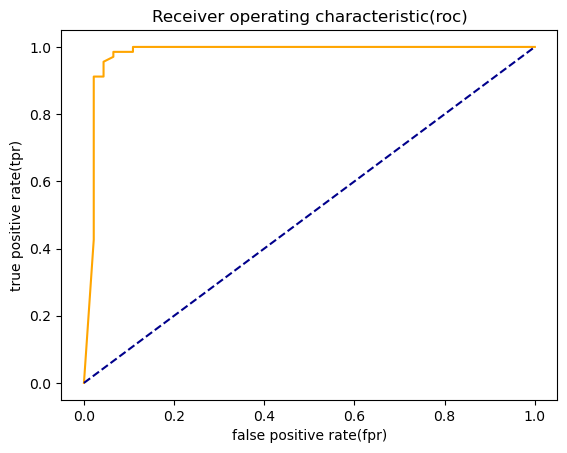

In [21]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="roc")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="guessing")
    plt.xlabel("false positive rate(fpr)")
    plt.ylabel("true positive rate(tpr)")
    plt.title("Receiver operating characteristic(roc)")
    plt.show()
plot_roc_curve(fpr,tpr)    

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.979539641943734

In [24]:
from sklearn.metrics import confusion_matrix
y_preds= clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[43,  3],
       [ 1, 67]], dtype=int64)

In [27]:
pd.crosstab(y_test,y_preds,rownames=["actual value"],colnames=["predicted value"])

predicted value,0,1
actual value,,
0,43,3
1,1,67


In [29]:
len(y_test)

114

In [30]:
 import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Dell\anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2024.2.2           |  py311haa95532_0         162 KB
    ------------------------------------------------------------
                                           Total:         162 KB

The following packages will be UPDATED:

  ca-certificates                     2023.08.22-haa95532_0 --> 2024.3.11-haa95532_0 
  certifi                         2023.7.22-py311haa95532_0 --> 2024.2.2-py311haa95532_0 
  openssl                                 3.0.10-h2bbff1b_2 --> 3.0.13-h2bbff1b_1 




certifi-2024.2.2     | 162 KB    |            |   0% 
certifi-2024.2.2     | 162 KB    | 9          |  10% 
certifi-2024.2.2     | 162 KB    | ########## | 100% 
    



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.4.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.4.0




<Axes: >

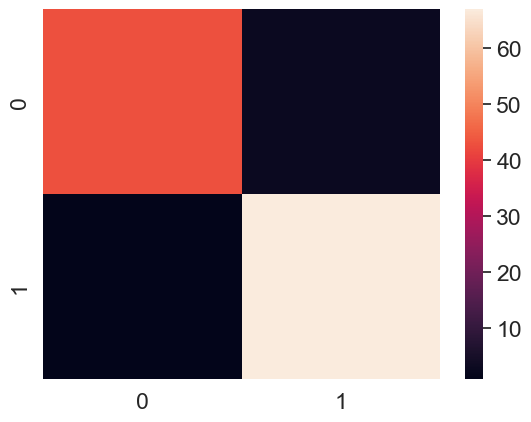

In [31]:
import seaborn as sns
sns.set(font_scale=1.5)
cnf_mat = confusion_matrix(y_test,y_preds)
sns.heatmap(cnf_mat)

In [32]:
import sklearn
sklearn.__version__

'1.3.0'

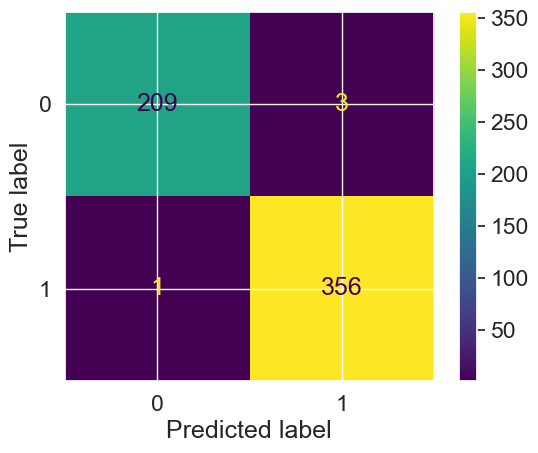

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x,y=y)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.96      0.99      0.97        68

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [3]:
from sklearn.model_selection import RandomizedSearchCV



# putting it all together

In [4]:
import pandas as pd
car_sales= pd.read_csv("car-sales-extended-missing-data.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [5]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [28]:
#getting data ready 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

#setup random seed
import numpy as np
np.random.seed(42)

#import data and data rows with missing table
import pandas as pd
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

#define different features and different pipelines

cat_feature= ["Make","Colour"]
cat_transform= Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing"))
    ,("onehot",OneHotEncoder(handle_unknown="ignore"))])
door_feature= ["Doors"]
door_transform= Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))])
num_features= ["Odometer (KM)"]
num_transform=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))])

#setup prepocessing steps (fill missing values, then convert to numbers)

preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat",cat_transform,cat_feature),
                        ("door",door_transform,door_feature),
                        ("num",num_transform,num_features)
                    ])
model = Pipeline(steps=[("preprocessor",preprocessor),
                       ("model",RandomForestRegressor())])

#Split Data

x= data.drop("Price",axis=1)
y=data["Price"]
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

#fit and score the model

model.fit(x_train,y_train)
model.score(x_test,y_test)

0.22188417408787875

In [36]:
from sklearn.model_selection import GridSearchCV

pipe_grid={
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators": [100,1000],
    "model__max_depth":[None,5],
    "model__max_features":[1.0],
    "model__min_samples_split":[2,4]
}
gs_model= GridSearchCV(model,pipe_grid,cv=5,verbose=2, error_score="raise")
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=1.0, model__min_samples_spl

[CV] END model__max_depth=5, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=5, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=5, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=5, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.3s
[CV] END model__max_depth=5, model__max_features=1.0, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': [1.0],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [37]:
gs_model.score(x_test,y_test)

0.3339554263158365